### Imports:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import cluster

### Load data:

In [2]:
import pandas as pd
data = pd.read_excel('measurements.xlsx')
data = data.values
data.shape

(10000, 7)

### Plot some 2D projections:

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


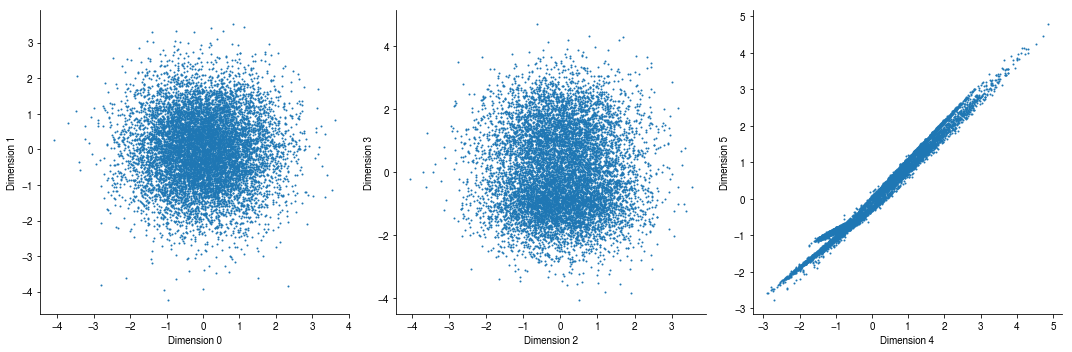

In [3]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].set_xlabel('Dimension 0')
ax[0].set_ylabel('Dimension 1')
ax[0].scatter(data[:, 0], data[:, 1], s=1) # plot x vs. y for first two dimensions
ax[1].set_xlabel('Dimension 2')
ax[1].set_ylabel('Dimension 3')
ax[1].scatter(data[:, 2], data[:, 3], s=1) # plot x vs. y for second two dimensions
ax[2].set_xlabel('Dimension 4')
ax[2].set_ylabel('Dimension 5')
ax[2].scatter(data[:, 4], data[:, 5], s=1) # plot x vs. y for third two dimensions

### Use PCA to reduce to top 2 most informative dimensions:

Text(0,0.5,'PC2')

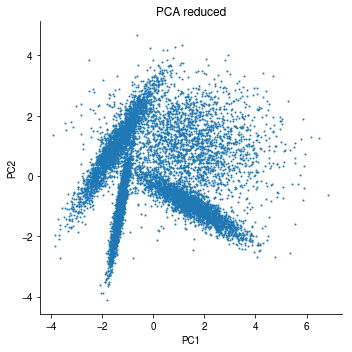

In [4]:
f, ax = plt.subplots(figsize=(5, 5))

pca = PCA(n_components=2) # create a PCA object, ask for only the top 2 components
data2 = pca.fit_transform(data) # calculate top 2 principal components, project data onto them
ax.scatter(data2[:, 0], data2[:, 1], s=1) # plot x vs. y for all samples
ax.set_title('PCA reduced')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

### Cluster with K-Means:

Text(0,0.5,'PC2')

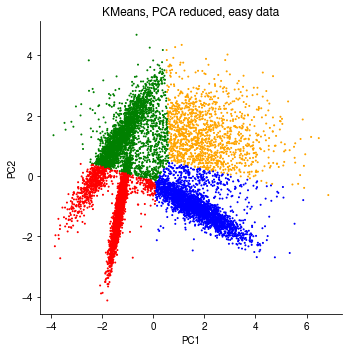

In [5]:
f, ax = plt.subplots(figsize=(5, 5))
# repeating list of colors that we can index into using cluster IDs:
colorset = np.array(['red', 'orange', 'green', 'blue', 'magenta', 'gray', 'brown', 'black']*10)

kmeans = cluster.KMeans(n_clusters=4) # create a KMeans object, tell it n_clusters you want
kmeans.fit(data2) # apply KMeans to the easy dimension-reduced data
cids = kmeans.labels_ # get resulting cluster IDs from the kmeans object, one for each sample
colors = colorset[cids] # convert cluster IDs to colors
ax.scatter(data2[:, 0], data2[:, 1], s=1, color=colors) # plot x vs. y for all samples
ax.set_title('KMeans, PCA reduced, easy data')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

### Cluster with DBSCAN:

Text(0,0.5,'PC2')

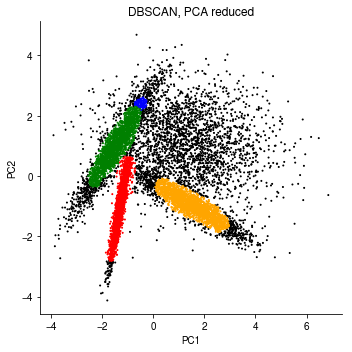

In [6]:
f, ax = plt.subplots(figsize=(5, 5))
# repeating list of colors that we can index into using cluster IDs:
colorset = np.array(['red', 'orange', 'green', 'blue', 'magenta', 'gray', 'brown', 'black']*10)

## easy data:
dbscan = cluster.DBSCAN(eps=0.2, min_samples=100) # create a DBSCAN object, set its two parameters
dbscan.fit(data2) # apply DBSCAN to the easy dimension-reduced data
cids = dbscan.labels_ # get resulting cluster IDs from the kmeans object, one for each sample
colors = colorset[cids] # convert cluster IDs to colors
ax.scatter(data2[:, 0], data2[:, 1], s=1, color=colors) # plot x vs. y for all samples
ax.set_title('DBSCAN, PCA reduced')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

In [7]:
pca.components_

array([[ 0.00316037,  0.00337024,  0.00106763, -0.02250756,  0.71673711,
         0.69695723, -0.00307541],
       [ 0.00994738,  0.00353245, -0.00594578,  0.99648763,  0.07062479,
        -0.04043284,  0.01558668]])

In [8]:
pca.explained_variance_

array([2.95882349, 1.84401785])